# Importar Librarias y datos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np   

from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
df = pd.read_parquet("output_08.parquet")

In [3]:
df.head()

,age,gender,employment_stat,wage_per_hour,working_week_per_year,occupation_code,total_employed,gains,losses,stocks_status,...,tax_status_Otro,tax_status_Single,citizenship_Native,citizenship_Otro,country_of_birth_own_US,migration_code_change_in_msa_MSA to MSA,migration_code_change_in_msa_Otro,migration_code_change_in_msa_unchanged,migration_code_change_in_reg_Otro,migration_code_change_in_reg_unchanged
0,0.853333,1.0,0.0,0.000000,1.000000,0.000000,0.333333,0.0,0.0,0.002916,...,True,False,True,False,True,False,False,False,False,False
1,0.666667,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,False,True,True,False,True,False,False,True,False,True
2,0.080000,0.0,0.0,0.050005,0.288462,0.565217,0.666667,0.0,0.0,0.000000,...,False,True,True,False,True,False,False,True,False,True
4,0.733333,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,False,False,True,False,True,False,False,False,False,False
5,0.400000,0.0,0.0,0.082508,1.000000,0.673913,1.000000,0.0,0.0,0.000000,...,False,False,False,False,False,False,False,True,False,True


In [4]:
df.columns

Index(['age', 'gender', 'employment_stat', 'wage_per_hour',
       'working_week_per_year', 'occupation_code', 'total_employed', 'gains',
       'losses', 'stocks_status', 'income_above_limit',
       'education_secondary_complete', 'education_secondary_incomplete',
       'education_technical_education/university_incomplete',
       'education_university_graduate_or_higher',
       'marital_status_Married-civilian spouse present',
       'marital_status_Never married', 'marital_status_Otro',
       'marital_status_Widowed', 'race_Otro', 'race_White', 'is_hispanic_Otro',
       'employment_commitment_Full-time schedules',
       'employment_commitment_Not in labor force',
       'employment_commitment_Otro',
       'industry_code_main_Manufacturing-durable goods',
       'industry_code_main_Not in universe or children',
       'industry_code_main_Otro', 'industry_code_main_Retail trade',
       'household_stat_Householder', 'household_stat_Nonfamily Householder',
       'household_stat

# Resample

In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [13]:
X = df.drop("income_above_limit", axis=1)
y = df["income_above_limit"]

X_resampled, y_resampled = SMOTE().fit_resample(X, y)



model = RandomForestClassifier()
model.fit(X_resampled, y_resampled)

importances = model.feature_importances_
feature_names = X.columns

sorted_features = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)
print(sorted_features)


[('stocks_status', 0.18477766529830025), ('occupation_code', 0.13747653856806644), ('age', 0.13037044645228796), ('total_employed', 0.07543475478657434), ('working_week_per_year', 0.07124897708874602), ('education_university_graduate_or_higher', 0.056403456887223806), ('gains', 0.052373829041188834), ('gender', 0.05207302952117568), ('industry_code_main_Not in universe or children', 0.018572290842033004), ('household_stat_Householder', 0.01732402195278683), ('losses', 0.015677810721891304), ('employment_stat', 0.01361469651701438), ('tax_status_Nonfiler', 0.01253433787472892), ('tax_status_Joint both under 65', 0.012383985295598228), ('industry_code_main_Otro', 0.012283649747719942), ('education_secondary_complete', 0.010125990124363908), ('wage_per_hour', 0.01006358405357744), ('education_secondary_incomplete', 0.008836760793781403), ('education_technical_education/university_incomplete', 0.007487029310250824), ('marital_status_Married-civilian spouse present', 0.007432368010748135), 

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)  # Apply scaling


# Elegir columnas

In [23]:
rfe = RFE(estimator=LogisticRegression(max_iter=500), n_features_to_select=7)
rfe.fit(X_resampled, y_resampled)

selected_features = X.columns[rfe.support_]
print(selected_features)

Index(['age', 'working_week_per_year', 'occupation_code', 'gains', 'losses',
       'stocks_status', 'household_stat_Householder'],
      dtype='object')


household stat es un categorica y por eso voy a añadir los de mas y pais de nacimiento

In [29]:
selected = ['age', 'working_week_per_year', 'occupation_code', 'gains', 'losses', 'stocks_status', 'household_stat_Householder', 'household_stat_Other', 'country_of_birth_own_US']

# Separar por el modelo

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled[selected], y_resampled, test_size=0.2, random_state=42)

# Probar varios numeros de Clusters

In [53]:
# La precisión sigue aumentando. Aumente el alcance y la visualización.

accuracies = []

for K in range(2, 15):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    #print(f"K value: {K}\nAccuracy: {accuracy_score(y_test, y_pred):.4f}\n")

print(accuracies)

[0.8719839256219456, 0.8887905052190644, 0.8775350349924226, 0.8827285575629609, 0.8725628756789893, 0.875593849507041, 0.8682377781940164, 0.8704343828222112, 0.8631975071091661, 0.8658368382515709, 0.8606943995095953, 0.862346109966455, 0.8581061521957533]


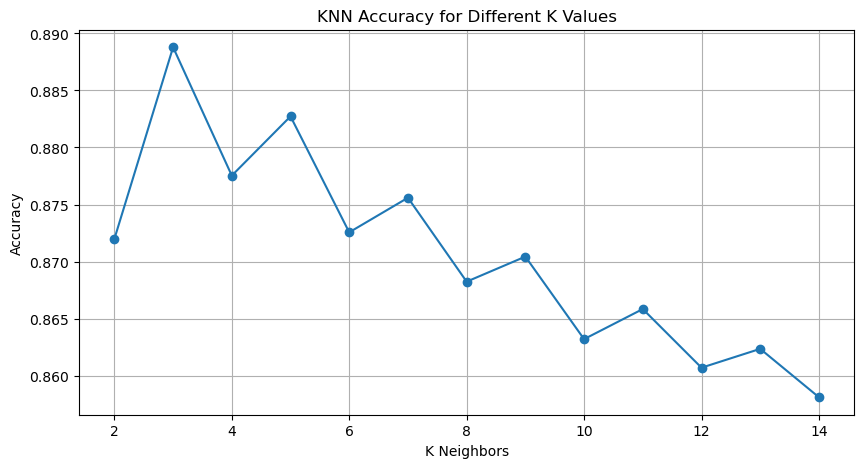

In [54]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 15), accuracies, marker='o', linestyle='-')
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
#plt.xticks(k_values)
plt.grid(True)
plt.show()

# Elegir numero optimo de Clusters

### Mirando ese grafico **3** es que sale con lo mejor presicion

In [59]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f"K value: {k}  Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

K value: 3  Accuracy: 0.8888


Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.91      0.89     29335
         1.0       0.91      0.87      0.89     29392

    accuracy                           0.89     58727
   macro avg       0.89      0.89      0.89     58727
weighted avg       0.89      0.89      0.89     58727



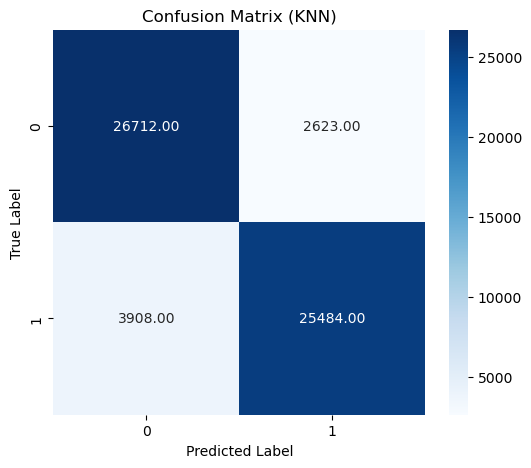

In [69]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True,  fmt='.2f', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [61]:
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

accuracy = (TN + TP) / (TN + TP + FN + FP)
sensibilidad = TP / (TP + FN)
especificidad = TN / (TN + FP)
npv_value = TN / (TN + FN) if (TN + FN) != 0 else 0

print(f"Accuracy: {accuracy}")
print(f"Sensibilidad: {sensibilidad}")
print(f"Especificidad: {especificidad}")
print(f"Negative Predictive Value (NPV): {npv_value}")

Accuracy: 0.8887905052190644
Sensibilidad: 0.8670386499727817
Especificidad: 0.91058462587353
Negative Predictive Value (NPV): 0.8723709993468322


# Elegir columanas con solver=Saga

In [25]:
rfe = RFE(estimator=LogisticRegression(solver='saga', max_iter=500), n_features_to_select=7)
rfe.fit(X_resampled, y_resampled)

selected_features = X.columns[rfe.support_]
print(selected_features)

Index(['age', 'working_week_per_year', 'gains', 'losses', 'stocks_status',
       'migration_code_change_in_msa_MSA to MSA',
       'migration_code_change_in_reg_Otro'],
      dtype='object')


household stat es un categorica y por eso voy a añadir los de mas y pais de nacimiento

In [116]:
selected = ['age', 'working_week_per_year', 'gains', 'losses', 'stocks_status',
       'migration_code_change_in_msa_MSA to MSA',
       'migration_code_change_in_msa_Otro',
       'migration_code_change_in_msa_unchanged',
       'migration_code_change_in_reg_Otro',
       'migration_code_change_in_reg_unchanged', 'country_of_birth_own_US']

# Separar por el modelo

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled[selected], y_resampled, test_size=0.2, random_state=42)

# Probar varios numeros de Clusters

In [123]:
# La precisión sigue aumentando. Aumente el alcance y la visualización.

accuracies = []

for K in range(2, 15):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    #print(f"K value: {K}\nAccuracy: {accuracy_score(y_test, y_pred):.4f}\n")

print(accuracies)

[0.8873261021336012, 0.8984794047031178, 0.8946140616752091, 0.8958230456178589, 0.892792071789807, 0.8961636044749434, 0.89240042910416, 0.8959422412178385, 0.8933029100754338, 0.8958060176750047, 0.8931496585897458, 0.8939499719038942, 0.8916682275614283]


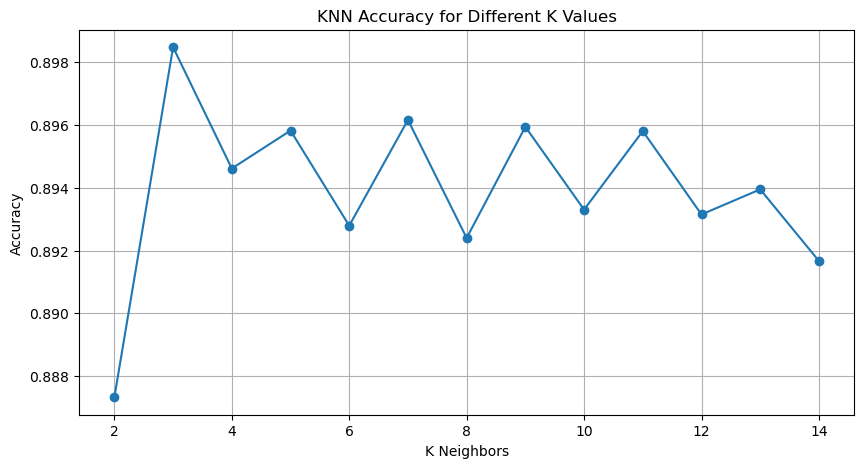

In [124]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 15), accuracies, marker='o', linestyle='-')
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
#plt.xticks(k_values)
plt.grid(True)
plt.show()

# Elegir numero optimo de Clusters

### Mirando ese grafico **3** es que sale con lo mejor presicion

In [129]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f"K value: {k}  Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

K value: 3  Accuracy: 0.8985


Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.92      0.90     29335
         1.0       0.92      0.87      0.90     29392

    accuracy                           0.90     58727
   macro avg       0.90      0.90      0.90     58727
weighted avg       0.90      0.90      0.90     58727



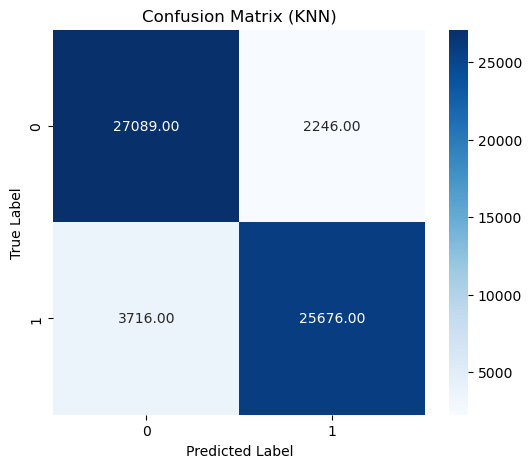

In [130]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True,  fmt='.2f', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [131]:
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

accuracy = (TN + TP) / (TN + TP + FN + FP)
sensibilidad = TP / (TP + FN)
especificidad = TN / (TN + FP)
npv_value = TN / (TN + FN) if (TN + FN) != 0 else 0

print(f"Accuracy: {accuracy}")
print(f"Sensibilidad: {sensibilidad}")
print(f"Especificidad: {especificidad}")
print(f"Negative Predictive Value (NPV): {npv_value}")

Accuracy: 0.8984794047031178
Sensibilidad: 0.8735710397387044
Especificidad: 0.9234361683995228
Negative Predictive Value (NPV): 0.8793702321051777
